# Joe Stanley
### ECE 524
### Homework 1

In [23]:
# Import Libraries to Support Calculations
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad as integrate
import eepower as eep
from eepower import u,m,k,M

## Problem 1
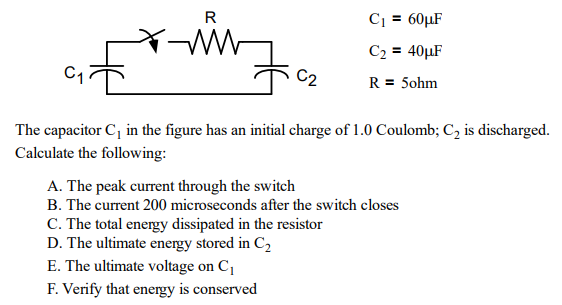

Cap1 V: 16666.666666666668 Cap2 V: 0.0
A) Max Current: 3333.3333333333335 A


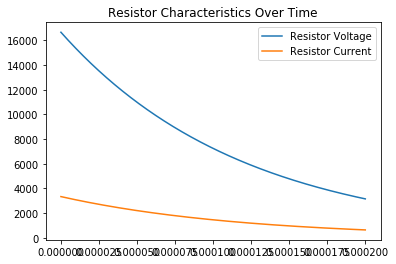

B) Current at 200uS: 629.585342792 A
C) Energy Lost in Resistor: 3333.333333333333
Final Voltage on Caps: 10000.0 V
D) Final Energy (Cap-2): 1999.9999999999998
E) Final Energy (Cap-1): 2999.9999999999995
F) Difference in Energy Input/Output: -9.094947017729282e-13


In [18]:
# Define Givens
C1 = 60*u
C2 = 40*u
R  = 5
Q1 = 1 # Coulomb
Q2 = 0

# Define Voltage from Charge
Vc1o = Q1/C1
Vc2o = Q2/C2
print("Cap1 V:",Vc1o,"Cap2 V:",Vc2o)

# A) Peak Current
Imax = (Vc1o - Vc2o)/R
print("A) Max Current:",Imax,"A")

# B) Current at 200uS after Close
# Define Capacitive Voltage Functions
def vcapdischarge(t,Vs,R,C):
    Vc = Vs*(np.exp(-t/(R*C)))
    return(Vc)
def vcapcharge(t,Vs,R,C):
    Vc = Vs*(1-np.exp(-t/(R*C)))
    return(Vc)

# Define Capacitor Charge transfer Function
def captransfer(t,Vs,R,Cs,Cd):
    tau = (R*Cs*Cd) / (Cs+Cd)
    rvolt = Vs*np.exp(-t/tau)
    vfinal = Vs*Cs/(Cs+Cd)
    return(rvolt,vfinal)

t_arr = np.linspace(0,200*u,1000)
Vr = captransfer(t_arr,Vc1o,R,C1,C2)
plt.title("Resistor Characteristics Over Time")
plt.plot(t_arr,Vr[0],label="Resistor Voltage")
plt.plot(t_arr,Vr[0]/R,label="Resistor Current")
plt.legend()
plt.show()

# Find Current
i200us = (Vr[0][-1:] / R)[0]
print("B) Current at 200uS:",i200us,"A")

# C) Energy Loss
# Define Capacitor Energy
def capenergy(c,v):
    return(1/2 * c * v**2)
cap_eq = (C1*C2/(C1+C2))
eloss = capenergy(cap_eq,Vc1o)
print("C) Energy Lost in Resistor:",eloss)

# D) Find Final Energy for Cap-2
vfinal = Vr[1]
print("Final Voltage on Caps:",vfinal,"V")
efinal2 = capenergy(C2,vfinal)
print("D) Final Energy (Cap-2):",efinal2)

# E) Final energy for Cap-1
efinal1 = capenergy(C1,vfinal)
print("E) Final Energy (Cap-1):",efinal1)

# F) Energy Conservation Confirmation
einitial = capenergy(C1,Vc1o)
econserved = einitial - efinal1 - efinal2 - eloss
print("F) Difference in Energy Input/Output:",econserved)

## Problem 2
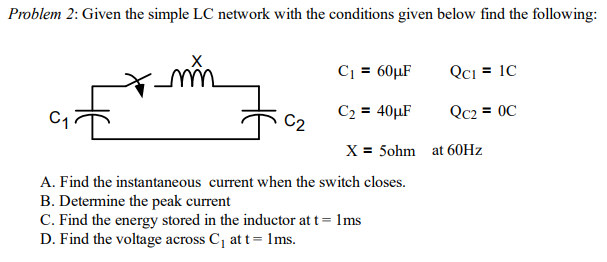

Inductive Reactance: 0.013262911924324612 H
A) Instantaneous Current (t=0+): 0 A


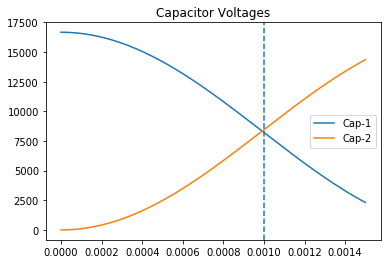

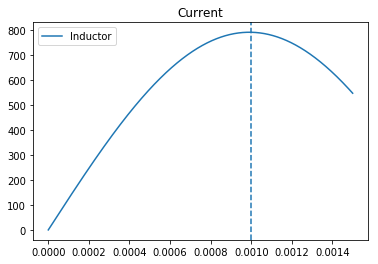

B) Maximum Current: 792.764163871 A
Inductor Current at 1ms: 792.6813391414418 A
C) Energy Stored in Inductor (t=1ms): 4166.833611614969
D) Voltage across Cap-1 (t=1ms): 8212.200885473283 V


In [14]:
# Define Givens
# All capacitor-related values remain unchanged
X = 5 # ohm @ 60Hz
L = eep.reactance(X)
print("Inductive Reactance:",L,"H")

# A) Instantaneous Current (Trick Question!)
ILo = 0
print("A) Instantaneous Current (t=0+):",ILo,"A")

# Iteratively Solve System to Evaluate Circuit
dt = 1e-7
t_arr = np.arange(0,1.5*m,dt)
I = np.array([ILo])
V1 = np.array([Vc1o])
V2 = np.array([Vc2o])
for t in t_arr:
    v1 = V1[-1:]
    v2 = V2[-1:]
    i = I[-1:]
    dV1 = i/C1*dt
    dI = (v1-v2)/L*dt
    V1 = np.append(V1, v1-dV1)
    V2 = np.append(V2, v2+dV1)
    I = np.append(I, i+dI)

# Plot
plt.plot(t_arr,V1[:-1],label="Cap-1")
plt.plot(t_arr,V2[:-1],label="Cap-2")
plt.title("Capacitor Voltages")
plt.axvline(1*m,linestyle='--')
plt.legend()
plt.show()
plt.plot(t_arr,I[:-1],label="Inductor")
plt.title("Current")
plt.axvline(1*m,linestyle='--')
plt.legend()
plt.show()

# B) Find Max Current
Imax = max(I)
print("B) Maximum Current:",Imax,"A")

# Define Inductor Energy Formula
def inductorenergy(L,I):
    return(1/2 * L * I**2)

# C) Inductor Energy at 1ms
# Collect the current at 1ms
index = np.where(t_arr==1*m)[0].item(0)
i1ms = I.item(index)
print("Inductor Current at 1ms:",i1ms,"A")
eL1ms = inductorenergy(L,i1ms)
print("C) Energy Stored in Inductor (t=1ms):",eL1ms)

# D) Voltage on Cap 1 at 1ms
vc1_1ms = V1.item(index)
print("D) Voltage across Cap-1 (t=1ms):",vc1_1ms,"V")

## Problem 3
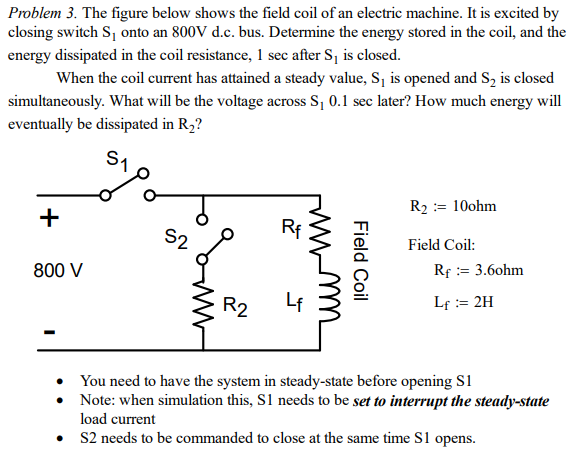

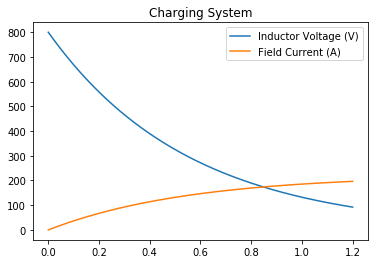

Energy Stored in Inductor (t=1sec): 34406.2195558
Energy Dissapated in Resistor: 60931.94224390389
Switch-1 Voltage (t=0.1sec): 224.0 V
Total Energy Dissipated in R2: 18823.529411764706


In [27]:
# Define Givens
Rf = 3.6
Lf = 2
XL = eep.phasorz(L=Lf)
R2 = 10
Vsrc = 800 # DC

# Define Inductor Charging/Discharging Functions
def inductorcharge(t,Vs,R,L):
    Vl = Vs*np.exp(-R*t/L)
    Il = Vs/R*(1-np.exp(-R*t/L))
    return(Vl,Il)
def inductordischarge(t,Io,R,L):
    Il = Io*np.exp(-R*t/L)
    Vl = Io*R*(1-np.exp(-R*t/L))
    return(Vl,Il)

# Calculate Current Through Field
t_arr = np.linspace(0,1.2,1000)
V, I = inductorcharge(t_arr,Vsrc,Rf,Lf)

# Plot
plt.plot(t_arr,V,label="Inductor Voltage (V)")
plt.plot(t_arr,I,label="Field Current (A)")
plt.title("Charging System")
plt.legend()
plt.show()

# Calculate Stored Energy in Inductor at 1 sec
eL1sec = inductorenergy(Lf,Ifield_chg(1))
print("Energy Stored in Inductor (t=1sec):",eL1sec)

# Define Resistor Power
Rpower = lambda t: Ifield_chg(t)*(Vsrc-vindcharge(t,Vsrc,Rf,Lf))

# Calculate Resistor Energy Dissipation
Renergy = integrate(Rpower,0,1)[0]
print("Energy Dissapated in Resistor:",Renergy)

# Evaluate "initial" current
Io = Vsrc / R

# Define VS1 Formula
def VS1(t):
    # Evaluate Inductor Voltage/Current
    VL, IL = inductordischarge(t,Io,Rf,Lf)
    # Evaluate V-Leg
    Vleg = VL + Rf*IL
    # Evaluate VS1
    return(Vsrc - Vleg)

# Calculate VS1 at 0.1 sec after switch change
VS1_pt1 = VS1(0.1)
print("Switch-1 Voltage (t=0.1sec):",VS1_pt1,"V")

# Find energy stored in inductor
energyTL = inductorenergy(Lf,Io)

# Find energy dissipated in R2 (as linearly related to Rf)
energyR2 = energyTL * R2 / (Rf+R2)
print("Total Energy Dissipated in R2:",energyR2)

## Problem 4
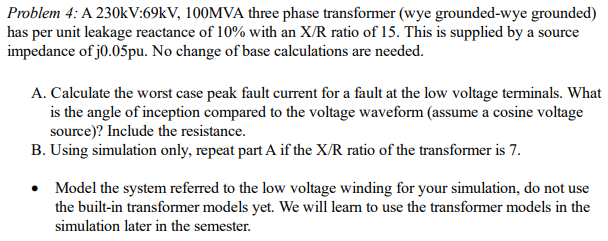

In [39]:
# Define Givens:
HVside = 230*k
LVside = 69*k
S3p = 100*M
S = S3p / 3
Rleak = 0.1 # PU
XR = 15
Xleak = XR*Rleak
leak = Rleak + 1j*Xleak
Zsrc = 0.05j

# No load is described, treat system as unloaded
# Worst-Case Fault will be 3-Phase Bolted Fault

# Start by finding Zeq
Zeq = leak + Zsrc
print("Equivalent System Impedance:",Zeq,"PU-ohms")

# Calculate Worst-Case Current
Ifault = eep.fault.phs3(1,(0,Zeq,0),sequence=False)
print("System Fault Currents:")
eep.cprint(Ifault,"PU-A",["Ia","Ib","Ic"])

# Demonstrate Inception Angle
inceptang = np.angle(Ifault[0],True)
print("Inception Angle:",inceptang,"°")

Equivalent System Impedance: (0.1+1.55j) PU-ohms
System Fault Currents:
[['Ia 0.644 ∠ -86.309° PU-A']
 ['Ib 0.644 ∠ 153.691° PU-A']
 ['Ic 0.644 ∠ 33.691° PU-A']]
Inception Angle: -86.3086140135 °
